In [1]:
from bitarray import bitarray
from mmh3 import hash as mmh3_hash
from hashlib import sha256
from hashlib import pbkdf2_hmac
from bitarray import bitarray

Question 5
* insert plot
The plot shows how time taken by the insert function changes with increasing sizes of the data set.
As we can see from the obtained plot, it starts with an increase, which is expected because in the beginning of the insert function, we will verify first if the hash input exists or not. Then, we start inserting. In fact, we can say that we have 2 functions running at this point. Later, we can see the line is decreasing as the sample size increases, and when the sample size is big enough, we observe a logarithmic function.
The time complexity isn't O(k) as it may be impacted by various facotrs other than the number of hash functions.

* verify plot
We know that the time complexity by the verify function is influenced by the number of hash functions but also by the bit array size. We can see that the time complexity is indeed linear O(k) for the verify function.
The space completely is relative to the bit array size. The space complexity is linear.



The false positive rate is 1.0522715271583091e-10.


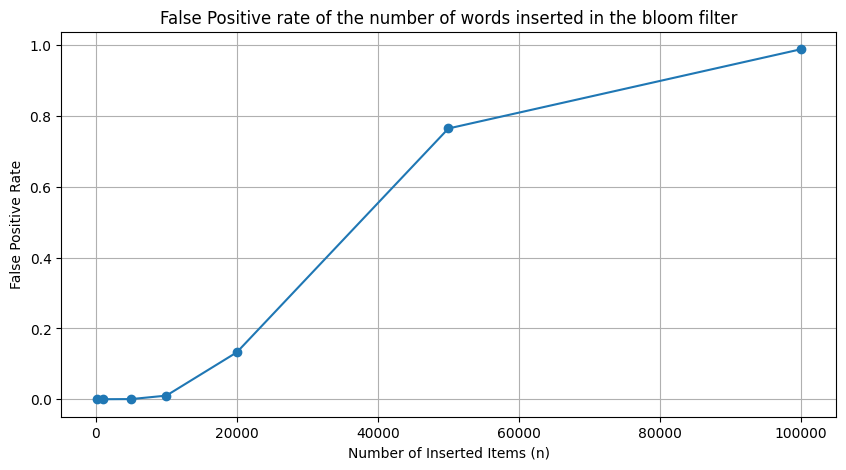

The compression rate is 4.374734911604851.


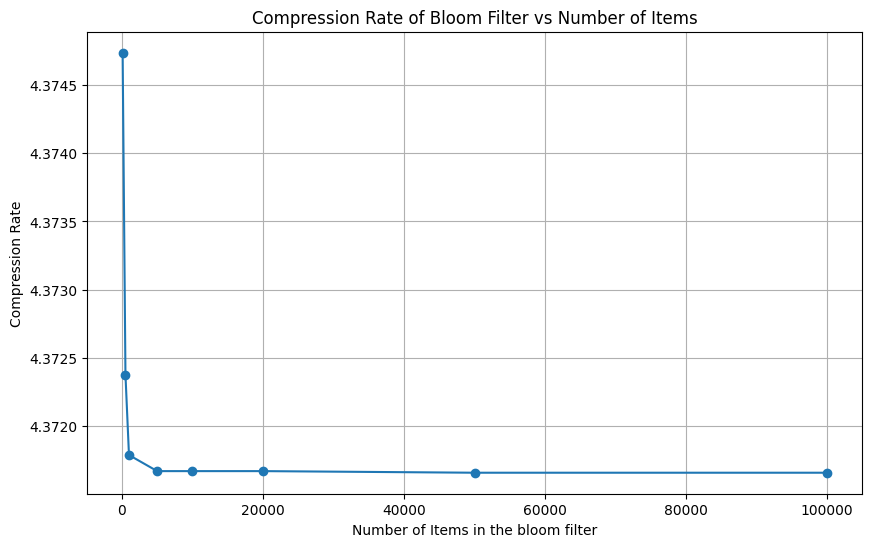

In [131]:
# importing necessary libraries
#from BitVector import BitVector
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
import matplotlib.pyplot as plt


class BloomFilter:
    '''
    Bloom Filter Class
    '''
    def __init__(self, expected_num: int, prob: float):
        '''
        expected_num: Number of words stored in the bloom filter
        prob: False Positives probability
        '''
        self.length = self.calc_length(expected_num, prob)
        self.prob = prob
        self.hash_num = self.optimum_hashes(self.length ,expected_num) # number of hashes
        self.C = self.compute_cr(self.length, expected_num)
        try:
            self.bit_vector = int(self.length) * bitarray('0')
        except ValueError as exp:
            print(f"An exception of the type {exp} has occured.")
    
    # methods
    def calc_length(self, n1: int, n2: float) -> int: 
        '''
        calculating size of array given the number of elements (n1) and the false positive probability (n2)
        
        parameters:
        n1 (int): number of elements in the bloom filter
        n2 (float): false positive probability

        returns
        size of a bloom filter (int)
        '''
        return int(-(n1 * math.log(n2)) / (math.log(2) ** 2))

    def optimum_hashes(self, item1, item2):
        '''
        calculating number of hash functions to use
        '''
        hash_number=((item1/item2)*math.log(2))
        return int(hash_number)
    
    def insert(self, data):
        '''
        adding an item to the bloom filter
        '''
        # verify if the type of data is integer or string
        if type(data) is int:
            data = str(data)
        if self.verify(data) == False:
            # initializitng a position pointer to 0
            position_pointer = 0
            for i in range(self.hash_num):
                if i%2 == 0:
                    # setting a certain bit in the array bit vector of bloom filter based on the hash of the input
                    position_pointer = int(mmh3.hash128(data, i, False) % int(self.length))
                    self.bit_vector[position_pointer] = True
                else:
                    # secure hashing and calculating posistion in the bit_vector array
                    position_pointer = int(pbkdf2_hmac('sha256', data.encode('utf-8'), str(i).encode('utf-8') * 2, 500_000).hex(), 16)%int(self.length)
                    self.bit_vector[position_pointer] = True
            print('The Input did not exist already, hence it has been added.')
        else:
            print('The Input probably already exists.')

    def verify(self, data):
        '''
        verifying whether an element is in the bloom filter
        '''
        if type(data) is int:
            data = str(data)
        position_verify = [None] * int(self.length)
        position_pointer = 0
        for i in range(self.hash_num):
            if i%2 == 0:
                position_pointer = int(mmh3.hash128(data, i, False)%int(self.length))   
                if self.bit_vector[position_pointer] == 1:
                    pass
                else:
                    return False
            else:
                position_pointer = int(pbkdf2_hmac('sha256', data.encode('utf-8'), str(i).encode('utf-8') * 2, 500_000).hex(),16)%int(self.length)
                if self.bit_vector[position_pointer] == 1:
                    pass
                else:
                    return False
        return True
    
    def __str__(self):  
        return "The bloom filter in string form is % s" % (self.bit_vector)
    
    # Question 7
    def compute_fpr(self, entered_n: int) -> float:
        '''
        calculating the value of the false positive rate
        
        parameters:
        entered_n (int): number of the entered/inserted items in a bloom filter

        returns
        false positive rate (float)
        '''
        return (1 - (1 - 1/self.length) ** (self.hash_num * entered_n)) ** self.hash_num

    def plot_fpr(self, values_n):
        '''
        plotting the false positive rate as a function of the number of words inserted in the bloom filter
        
        parameters:
        values_n (integers' list): the values of numbers of items to be sorted in the bloom filter

        returns
        plot (graph)
        '''
        plt.figure(figsize=(10,5))
        # list that will contain the false positive rates
        fp_rates= []
        for entered_n in values_n:
            # computing the false positive rate for each enetered item (entered_n)
            fp_rate = self.compute_fpr(entered_n)
            fp_rates.append(fp_rate)

        plt.plot(values_n, fp_rates,marker='o')
        plt.title("False Positive rate of the number of words inserted in the bloom filter")
        plt.xlabel('Number of Inserted Items (n)')
        plt.ylabel('False Positive Rate')
        plt.grid(True)
        plt.show()
        
    # Question 8
    def compute_cr(self, items_number, bits_number = 32):
        '''
        calculating the compression rate (CR) of a bloom filter as a function of the expected number of elements and the rate of false positives 
        
        parameters:
        items_number (int): number of items to be sorted in bloom filter
        bits_number (int): number of bits per element (default = 32)

        returns:
        Compression rate of bloom filter (float)
        '''
        # calculating again the bloom filter's size
        m = self.calc_length(items_number, self.prob)
        
        # computing the size of a normal (traditional) data structure
        old_length = items_number * bits_number
        
        # calculating the compression rate
        comp_rate = (old_length / m) * math.exp(-items_number / m)
        return comp_rate
     
    def plot_cr(self, items_number, bits_number =32):
        """
        plotting the compression rate of a bloomfilter as a function of the expected number of elements and the rate of false positives.

        parameters:
        items_number (list of int): values for the number of items expected to be stored in the filter
        bits_number (int): the number of bits per element in a data structure (by default 32)

        returns
        plot (graph)
        """
    
        plt.figure(figsize=(10, 6))
        compression_rates = []

        for n in items_number:
            compression_rate = self.compute_cr(n, bits_number)
            compression_rates.append(compression_rate)

        plt.plot(items_number, compression_rates, marker='o')

        # naming and labeling the plot
        plt.title('Compression Rate of Bloom Filter vs Number of Items')
        plt.xlabel('Number of Items in the bloom filter')
        plt.ylabel('Compression Rate')
        plt.grid(True)
        plt.show()


# testing for creating the bloom filter
n = 1000  
p = 0.05  
bfilter=BloomFilter(n,p)

# false positive rate and its plot (question 7)
n_expected = 10000  
fp_probability_desired = 0.01    
bloom_filter = BloomFilter(n_expected, fp_probability_desired)
result_fpr = bfilter.compute_fpr(5)
print(f'The false positive rate is {result_fpr}.')
values_n = [100, 1000, 5000, 10000, 20000, 50000, 100000] 
bloom_filter.plot_fpr(values_n)

# calculating the compression rate and its plot (question 8)
result = bfilter.compute_cr(100,32)
print(f'The compression rate is {result}.')
n_first = 10000  
p_wanted = 0.05 
bloom_filter =BloomFilter(n_first, p_wanted)
n_values = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]  
bloom_filter.plot_cr(n_values)

In [132]:
#!usr/bin/env/ pyhton
# BF_test.py
# importing necessary packages
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
from BloomFilter import BloomFilter
import numpy as np
import random
from wonderwords import RandomSentence
import time
import matplotlib.pyplot as plt
import json
from gen_data import DNA_data_generate,DNA_data_generate2

#prepare for Question 7 and Question 8

# setting the seed
np.random.seed(0)
random.seed(0)

# declaring the properties
length = 5
probability = 0.05
max_size = 2

# test function 
def test(data1,data2):
    lst1 = data1
    lst2 = data2
    bl = BloomFilter(length,probability)
    print('Size of Bloom Filter: ', int(bl.length))
    print('Optimal number of hahes for the Bloom Filter: ', int(bl.hash_num))

    for i in range(length):
        bl.insert(lst1[i])
    print('Bloom Filter created')

    #test
    count1 = 0
    count2 = 0
    false_count = 0
    for i in range(len(lst1)):
        if bl.verify(lst1[i]) == True:
            count1 += 1
    if count1 == len(lst1):
        print('Present Data passed')
            
    for i in range(len(lst2)):
        if bl.verify(lst2[i]) == False:
            count2 += 1
        else:
            print('False Positive: ', lst2[i], bl.bit_vector)
    if count2 == len(lst2):
        print('Non-present Data passed')

# opening the text file in read mode
with open("input_data.txt", 'r') as file:
    data = file.read().strip()
    data_list = eval(data) 

data1=data_list
print(data1)

# opening the text file in read mode
with open("check_data.txt", 'r') as file:
    data = file.read().strip()
    data_list = eval(data) 

data2 = data_list
print(data2)

# calling test function
test(data1,data2)


ModuleNotFoundError: No module named 'BitVector'

In [ ]:
#BloomFilter_test.py
#libraries
from BitVector import BitVector
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
from BloomFilter import BloomFilter
import numpy as np
import random
from wonderwords import RandomSentence
import time
import matplotlib.pyplot as plt

np.random.seed(0)
random.seed(0)

length = 20
probability = 0.05
max_size = 5

def generate_number(length):
    lst=[]
    for i in range(length):
        lst.append(random.randrange(1, 100000))
    return lst

def generate_number2(length, lst_prior):
    lst = []
    for i in range(length):
        temp = (random.randrange(1, 100000))
        if temp not in (lst_prior):
            lst.append(temp)
    return lst

num1 = (generate_number(length))

num2 = (generate_number2(length,num1))

def test(data1, data2):
    lst1 = data1
    lst2 = data2

    bl = BloomFilter(length,probability)
    print('Size of Bloom Filter: ', int(bl.length))
    print('Optimal number of Hahes for the Bloom Filter: ', int(bl.hash_num))

    for i in range(length):
        bl.insert(lst1[i])
      
    print('Bloom Filter created')

    #test
    count1 = 0
    count2 = 0
    false_count = 0
    for i in range(len(lst1)):
        if bl.verify(lst1[i]) == True:
            count1 += 1
    if count1 == len(lst1):
        print('Present Data passed')
    
    for i in range(len(lst2)):
        if bl.verify(lst2[i]) == False:
            count2 += 1
        else:
            print('False Positive: ', lst2[i], bl.bit_vector)
            false_count += 1
    if count2 == len(lst2):
        print('Non-present Data passed')
    else:
        print("The False Positives have been printed above and they are: ",false_count)

test(num1, num2)

def gen_sentence_data(length):
    lst = []
    for i in range(length):
        s = RandomSentence()
        lst.append(s.sentence())
    return lst

In [ ]:
#!usr/bin/env/ pyhton
# gen_data.py
# importing necessary packages
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
from BloomFilter import BloomFilter
import numpy as np
import random
from wonderwords import RandomSentence
import time
import matplotlib.pyplot as plt
import json

#prepare for Question 7 and Question 8

# setting the seed
np.random.seed(0)
random.seed(0)

# declaring the properties
length = 100000
probability = 0.05
max_size = 100

def DNA_data_generate(length: int):
    """
    Function to generate the dna sequence
    Args:
    length: int
    Output:
    returns a list of the DNA sequence
    """
    lst = []
    for i in range(length):
        seq_length = random.randint(1,max_size)
        lst.append(''.join(np.random.choice(('C','G','T','A'), seq_length )))
    return lst

def DNA_data_generate2(length,lst_prior):
    lst = []
    i = 0
    while i != length:
        seq_length = random.randint(1, max_size)
        temp =''.join(np.random.choice(('C','G','T','A'), seq_length ))
        if temp not in (lst_prior):
            lst.append(temp)
            i += 1
    return lst

def gen_sentence_data():
    lst = []
    for i in range(length):
        s = RandomSentence()
        lst.append(s.sentence())
    return lst

data1 = DNA_data_generate(length)
data2 = DNA_data_generate2(length, data1)

f = open('input_data.txt', 'w')
json.dump(data1, f)
f.close()

f = open('check_data.txt', 'w')
json.dump(data2, f)
f.close()

In [ ]:
#!usr/bin/env/ pyhton
# insert_test_performance.py
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
from BloomFilter import BloomFilter
import numpy as np
import random
from wonderwords import RandomSentence,RandomWord
import time
import matplotlib.pyplot as plt

def generate_words(n=0):
    words=[]
    for i in range(n):
        r = RandomWord()
        words.append(r.word())
    return set(words)

def main():
    print('insert')
    data=generate_words(1000)
    data_list = list(data)

    sizes = [10, 50,75, 100,200,350, 500, 1_000,5_000]

    samples = [
        random.sample(data_list, k=size) for size in sizes
    ]

    nr_runs = 3
    times = {}
    insert_sample = random.sample(data_list, k=20)
    i = 0

    for sample in samples:
        btree = BloomFilter(sizes[i],0.05)
        i += 1
        for word in sample:
            btree.insert(word)
        times[len(sample)] = 0.0
        for _ in range(nr_runs):
            start_time = time.time_ns()
            for word in insert_sample:
                btree.insert(word)
            end_time = time.time_ns()
            times[len(sample)] += end_time - start_time
        times[len(sample)] /= nr_runs*1_000_000.0
        print(times)

    plt.plot(times.keys(), times.values());
    plt.savefig('plotinsert.png')


if __name__ == "__main__":
    main()

In [ ]:
#!usr/bin/env/ pyhton
#verify_test_performance.py
import math
import mmh3
from hashlib import sha256
import hmac,hashlib,io
from hashlib import pbkdf2_hmac
from bitarray import bitarray
from BloomFilter import BloomFilter
import numpy as np
import random
from wonderwords import RandomSentence,RandomWord
import time
import matplotlib.pyplot as plt

def generate_words(n = 0):
    '''
    Generating words function
    '''
    words=[]
    for i in range(n):
        r = RandomWord()
        words.append(r.word())
    return set(words)

def main():
    print('verify')
    data = generate_words(1000)
    data_list = list(data)
    # optimal sizes chosen
    sizes = [10, 50,75, 100,200,350, 500, 1_000,5_000]
    samples = [
        random.sample(data_list, k=size) for size in sizes
    ]
    # number of runs
    nr_runs = 3
    times = {}
    verify_sample = random.sample(data_list, k=20)
    i = 0
    for sample in samples:
        btree = BloomFilter(sizes[i],0.05)
        i += 1
        for word in sample:
            btree.insert(word)
        times[len(sample)] = 0.0
        for _ in range(nr_runs):
            start_time = time.time_ns()
            for word in verify_sample:
                btree.verify(word)
            end_time = time.time_ns()
            times[len(sample)] += end_time - start_time
        times[len(sample)] /= nr_runs*1_000_000.0
        print(times)

# plotting to see the performance
    plt.plot(times.keys(), times.values());
    plt.savefig('plotverify.png')

if __name__ == "__main__":
    main()